# マルチメディア処理入門 第12回

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schwalbe1996/multimedia_intro/blob/main/notebook12.ipynb)

Google Colabで試したい場合は、上のボタンをクリックして、「ドライブにコピー」を実行してください。（ドライブにコピーしないとコードを変更しても保存できません）

In [1]:
%pylab inline
import matplotlib.pyplot as plt
from pylab import cm
import mpl_toolkits.axes_grid1
import cv2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## 画像表示用の関数

In [2]:
def show_image(image, cmap = cm.gray):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)
    if image.ndim == 3:
        im = ax.imshow(image[:,:,::-1])
    elif image.ndim == 2:
        im = ax.imshow(image, cmap=cmap)
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
        cax = divider.append_axes('right','3%', pad='2%')
        fig.colorbar(im, cax=cax)

## 画像ファイルの読み込み(いつものトマト）
- このノートブックと同じフォルダに画像ファイル(tomato_sample.png)を置いてください。
- 今日もモノクロ画像として扱います

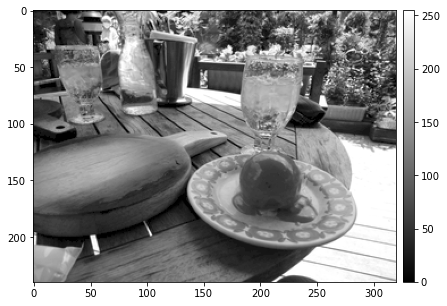

In [3]:
image = cv2.imread("tomato_sample.png",0)
show_image(image)

# Sobelフィルタ

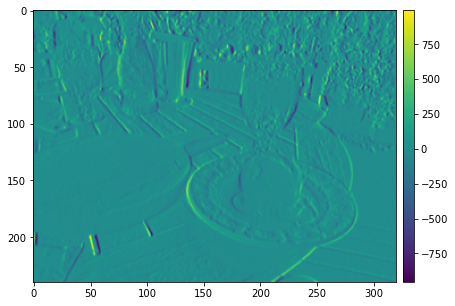

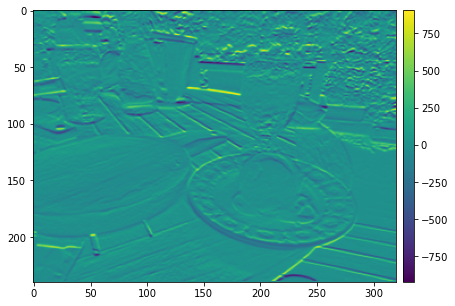

In [4]:
# X軸方向のSobelフィルタ
## ddepthは小数点表記（cv2.CV_32F or cv2.CV_64F)にしてください。
## X軸方向のSobelフィルタの場合は、dx=1, dy=0にします。
edge_x = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
show_image(edge_x, cmap=cm.viridis) # 分かりやすいように色をつけてます。

# Y軸方向のSobelフィルタ
## X軸方向のSobelフィルタの場合は、dx=0, dy=1にします。
edge_y = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
show_image(edge_y, cmap=cm.viridis)

# Cannyフィルタ

## まずは上のSobelフィルタの結果を使ってみる
$\sqrt{ \left( \frac{\partial f(x,y)}{\partial x} \right)^2 + \left( \frac{\partial f(x,y)}{\partial y}\right)^2}$を計算します。

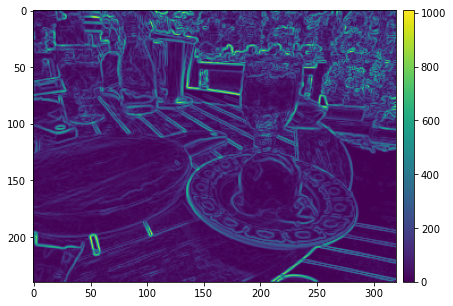

In [5]:
edge_grad = np.sqrt( edge_x**2 + edge_y**2)
show_image(edge_grad, cm.viridis)

## Cannyフィルタ
- 閾値を2つ（threshold1, threshold2)を使います。
- 閾値を変えながらいろいろ試してみてください

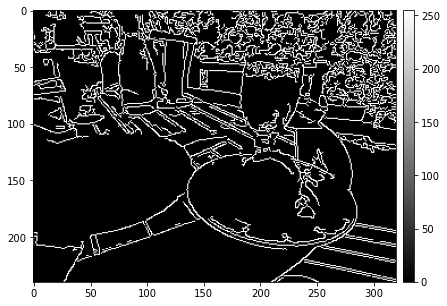

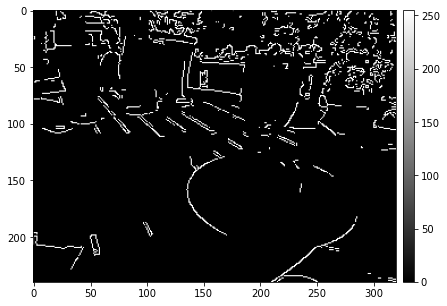

In [5]:
edge = cv2.Canny(image, 100, 500)
show_image(edge)

edge = cv2.Canny(image, 400, 500)
show_image(edge)

# Ｈｏｕｇｈ変換による直線検出

## 画像ファイルの読み込み
- このノートブックと同じフォルダに画像ファイル(sudoku.png)を置いてください。

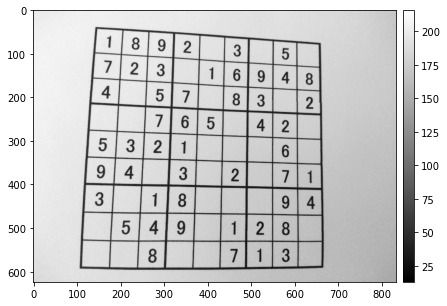

In [6]:
image = cv2.imread("sudoku.png",0)
show_image(image)

##　Cannyフィルタでエッジ検出

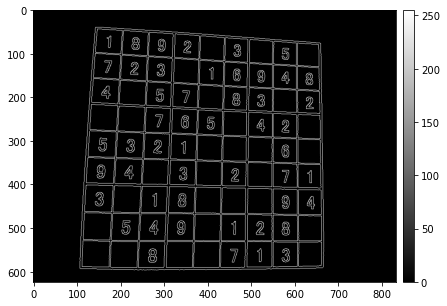

In [7]:
# 閾値は適当に調整してもらって構いません
edge = cv2.Canny(image, 200, 400)
show_image(edge)

## OpenCVのHoughLinesPを使った Hough変換

- cv2.HoughLinesP関数を使います。講義で説明した手法とは少しだけ違います（確率的Hough変換：こっちの方が新しい）が、原理はほぼ同じです。

- rho=1 : 1ピクセル刻みで直線検出
- theta=np.pi/180.0 : 直線の傾きを$\pi/180$ラジアン刻み（1°刻み）で検出
- threshold=100: 100票以上投票された$(\rho,\theta)$のみを直線として検出
- minLineLength=100: 長さ100以上の線分のみを検出
- maxLineGap=50: 2つの線分を1つの直線と見なすときに許容される最大の長さ

In [10]:
lines = cv2.HoughLinesP(edge, rho=1, theta=np.pi/180.0, threshold=200, minLineLength=100, maxLineGap=50)
print ("{}本の線分が検出されました".format(lines.shape[0]))

39本の線分が検出されました


### Hough変換結果の表示

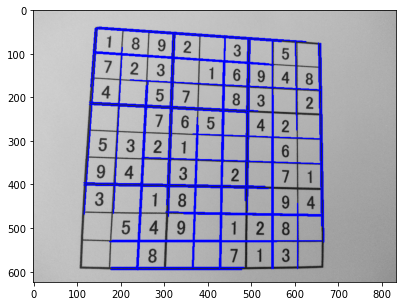

In [11]:
disp = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for l in lines:
    x0, y0, x1, y1 = l[0]
    # 点(x0,y0)と点(x1,y1)とを結ぶ線分を画像に書き込みます
    cv2.line(disp, (x0,y0), (x1,y1), color=(255,0,0), thickness=2)
    
show_image(disp)